# **Predicting whether a Person will Buy a Computer using Machine Learning**





# **Part 1 - Dataframe for Machine Learning**

# 1) Importing Imporant Libraries

In [ ]:
#importing important libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# 2) Read Data Source

In [ ]:
df = pd.read_csv('Buy_Computer.csv')
df

,age,income,student,credit_rating,Buy_Computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


# 3) Map Fields from Categorical Data to Numerical

In [ ]:
#Conversion of Age Data to Numerical
df ['age'] = df ['age'].map ({'youth': 0, 'middle_age': 1, 'senior': 3 })
df

,age,income,student,credit_rating,Buy_Computer
0,0,high,no,fair,no
1,0,high,no,excellent,no
2,1,high,no,fair,yes
3,3,medium,no,fair,yes
4,3,low,yes,fair,yes
5,3,low,yes,excellent,no
6,1,low,yes,excellent,yes
7,0,medium,no,fair,no
8,0,low,yes,fair,yes
9,3,medium,yes,fair,yes


In [ ]:
#Conversion of Income Data to Numerical
df ['income'] = df ['income'].map ({'low': 0, 'medium': 1, 'high': 3 })
df

,age,income,student,credit_rating,Buy_Computer
0,0,3,no,fair,no
1,0,3,no,excellent,no
2,1,3,no,fair,yes
3,3,1,no,fair,yes
4,3,0,yes,fair,yes
5,3,0,yes,excellent,no
6,1,0,yes,excellent,yes
7,0,1,no,fair,no
8,0,0,yes,fair,yes
9,3,1,yes,fair,yes


In [ ]:
#Conversion of Student Data to Numerical
df ['student'] = df ['student'].map ({'no': 0, 'yes': 1})
df

,age,income,student,credit_rating,Buy_Computer
0,0,3,0,fair,no
1,0,3,0,excellent,no
2,1,3,0,fair,yes
3,3,1,0,fair,yes
4,3,0,1,fair,yes
5,3,0,1,excellent,no
6,1,0,1,excellent,yes
7,0,1,0,fair,no
8,0,0,1,fair,yes
9,3,1,1,fair,yes


In [ ]:
#Conversion of Credit Rating Data to Numerical
df ['credit_rating'] = df ['credit_rating'].map ({'fair': 0, 'excellent': 1})
df

,age,income,student,credit_rating,Buy_Computer
0,0,3,0,0,no
1,0,3,0,1,no
2,1,3,0,0,yes
3,3,1,0,0,yes
4,3,0,1,0,yes
5,3,0,1,1,no
6,1,0,1,1,yes
7,0,1,0,0,no
8,0,0,1,0,yes
9,3,1,1,0,yes


In [ ]:
#Conversion of Buy Computer Data to Numerical
df ['Buy_Computer'] = df ['Buy_Computer'].map ({'no': 0, 'yes': 1})
df

,age,income,student,credit_rating,Buy_Computer
0,0,3,0,0,0
1,0,3,0,1,0
2,1,3,0,0,1
3,3,1,0,0,1
4,3,0,1,0,1
5,3,0,1,1,0
6,1,0,1,1,1
7,0,1,0,0,0
8,0,0,1,0,1
9,3,1,1,0,1


# 4) Check the Predictor

In [ ]:
#deleting 'Buy_Computer' for x variable
x = df.drop('Buy_Computer', axis = 1)
y = df['Buy_Computer']

# 5) Slicing Data for Training

80% - Train Data and 20%  - Testing Data

**Train Data**

In [ ]:
#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
#displaying the value of x_train 80% of train data
x_train

,age,income,student,credit_rating
4,3,0,1,0
2,1,3,0,0
6,1,0,1,1
8,0,0,1,0
11,1,1,0,1
10,0,1,1,1
5,3,0,1,1
0,0,3,0,0
12,1,3,1,0
1,0,3,0,1


In [ ]:
#displaying the value of x_train 20% of train data
x_test

,age,income,student,credit_rating
9,3,1,1,0
3,3,1,0,0
13,3,1,0,1


**Testing Data**

In [ ]:
#displaying the value of y_train 80% of testing data
y_train

4     1
2     1
6     1
8     1
11    1
10    1
5     0
0     0
12    1
1     0
7     0
Name: Buy_Computer, dtype: int64

In [ ]:
#displaying the value of y_train 20% of testing data
y_test

9     1
3     1
13    0
Name: Buy_Computer, dtype: int64

# 6) Model Training

In [ ]:
#Import Machine Learning Model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

**Predicted Values of x_test**

In [ ]:
#this line uses the trained model to make predictions on the x_test data.
predicted_value = model.predict(x_test)
predicted_value

array([1, 0, 0])

**Generate the Confusion Matrix**

In [ ]:
cf = confusion_matrix (predicted_value, y_test)
cf

array([[1, 1],
       [0, 1]])

# 7) Computation of Accuracy, Precision, Recall, and Classification Report

**Accuracy, Precision, and Recall**

In [ ]:
#Importing Seaborn library
import seaborn as sns

#Computing and Printing the values
print (f"Accuracy: {round(accuracy_score(predicted_value, y_test), 2) * 100}")
print (f"Precision: {round(precision_score(predicted_value, y_test), 2) * 100}")
print (f"Recall: {round(recall_score(predicted_value, y_test), 2) * 100}")

Accuracy: 67.0
Precision: 50.0
Recall: 100.0


In [ ]:
print (classification_report (predicted_value, y_test))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



# 8) Test Case Scenarios

**Test Case #1** - True Positive Result

*The program output a True Positive result, indicating a decision WILL BUY A COMPUTER, and having the same result in the dataset*

In [ ]:
#Program to input the age, income, student, credit_rating
df_sample = pd.DataFrame (columns = ['age', 'income', 'student', 'credit_rating'])
age = input ('Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: ')
income = input ('Enter Income [Low = 0, Medium = 1, High = 2]: ')
student = input ('Are you a Student [No = 0, Yes = 1]: ')
creditrating = input ('Credit Rating [Fair = 0, Excellent = 1]: ')

df_sample.loc [len(df_sample.index)] = [age,income,student,creditrating]

#Showing Sample Data
df_sample

#Predicted value of the sample data frame
model.predict(df_sample)

#Creating python program to compute prediction
prediction = model.predict(df_sample)
if prediction == 0:
  print ('WILL NOT buy a Computer')
else:
  print ('WILL BUY a Computer')

Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: 0
Enter Income [Low = 0, Medium = 1, High = 2]: 0
Are you a Student [No = 0, Yes = 1]: 1
Credit Rating [Fair = 0, Excellent = 1]: 0
WILL BUY a Computer


**Test Case #2** - True Negative Result

*The program output a True Negative result, indicating a decision WILL NOT BUY A COMPUTER, and having the same result in the dataset*

In [ ]:
#Program to input the age, income, student, credit_rating
df_sample = pd.DataFrame (columns = ['age', 'income', 'student', 'credit_rating'])
age = input ('Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: ')
income = input ('Enter Income [Low = 0, Medium = 1, High = 2]: ')
student = input ('Are you a Student [No = 0, Yes = 1]: ')
creditrating = input ('Credit Rating [Fair = 0, Excellent = 1]: ')

df_sample.loc [len(df_sample.index)] = [age,income,student,creditrating]

#Showing Sample Data
df_sample

#Predicted value of the sample data frame
model.predict(df_sample)

#Creating python program to compute prediction
prediction = model.predict(df_sample)
if prediction == 0:
  print ('WILL NOT buy a Computer')
else:
  print ('WILL BUY a Computer')

Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: 0
Enter Income [Low = 0, Medium = 1, High = 2]: 2
Are you a Student [No = 0, Yes = 1]: 0
Credit Rating [Fair = 0, Excellent = 1]: 0
WILL NOT buy a Computer


**Test Case #3** - False Negative Result

*The program output a False Negative result, indicating a decision WILL NOT BUY A COMPUTER, despite the actual dataset result being positive result.*

In [ ]:
#Program to input the age, income, student, credit_rating
df_sample = pd.DataFrame (columns = ['age', 'income', 'student', 'credit_rating'])
age = input ('Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: ')
income = input ('Enter Income [Low = 0, Medium = 1, High = 2]: ')
student = input ('Are you a Student [No = 0, Yes = 1]: ')
creditrating = input ('Credit Rating [Fair = 0, Excellent = 1]: ')

df_sample.loc [len(df_sample.index)] = [age,income,student,creditrating]

#Showing Sample Data
df_sample

#Predicted value of the sample data frame
model.predict(df_sample)

#Creating python program to compute prediction
prediction = model.predict(df_sample)
if prediction == 0:
  print ('WILL NOT buy a Computer')
else:
  print ('WILL BUY a Computer')

Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: 1
Enter Income [Low = 0, Medium = 1, High = 2]: 2
Are you a Student [No = 0, Yes = 1]: 0
Credit Rating [Fair = 0, Excellent = 1]: 0
WILL NOT buy a Computer


**Test Case #4** - [OWN SAMPLE DATA]

*By having to try my own 2 sample data that is not in the dataset, the program output a Negative result, indicating a decision WILL NOT BUY A COMPUTER.*

In [ ]:
#Program to input the age, income, student, credit_rating
df_sample = pd.DataFrame (columns = ['age', 'income', 'student', 'credit_rating'])
age = input ('Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: ')
income = input ('Enter Income [Low = 0, Medium = 1, High = 2]: ')
student = input ('Are you a Student [No = 0, Yes = 1]: ')
creditrating = input ('Credit Rating [Fair = 0, Excellent = 1]: ')

df_sample.loc [len(df_sample.index)] = [age,income,student,creditrating]

#Showing Sample Data
df_sample

#Predicted value of the sample data frame
model.predict(df_sample)

#Creating python program to compute prediction
prediction = model.predict(df_sample)
if prediction == 0:
  print ('WILL NOT buy a Computer')
else:
  print ('WILL BUY a Computer')

Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: 0
Enter Income [Low = 0, Medium = 1, High = 2]: 0
Are you a Student [No = 0, Yes = 1]: 0
Credit Rating [Fair = 0, Excellent = 1]: 1
WILL NOT buy a Computer


**Test Case #5** - [OWN SAMPLE DATA]

*By having to try my own 2 sample data that is not in the dataset, the program output a Positive result, indicating a decision WILL BUY A COMPUTER.*

In [ ]:
#Program to input the age, income, student, credit_rating
df_sample = pd.DataFrame (columns = ['age', 'income', 'student', 'credit_rating'])
age = input ('Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: ')
income = input ('Enter Income [Low = 0, Medium = 1, High = 2]: ')
student = input ('Are you a Student [No = 0, Yes = 1]: ')
creditrating = input ('Credit Rating [Fair = 0, Excellent = 1]: ')

df_sample.loc [len(df_sample.index)] = [age,income,student,creditrating]

#Showing Sample Data
df_sample

#Predicted value of the sample data frame
model.predict(df_sample)

#Creating python program to compute prediction
prediction = model.predict(df_sample)
if prediction == 0:
  print ('WILL NOT buy a Computer')
else:
  print ('WILL BUY a Computer')

Enter Age [Youth = 0, Middle Age = 1, Senior = 2]: 2
Enter Income [Low = 0, Medium = 1, High = 2]: 2
Are you a Student [No = 0, Yes = 1]: 1
Credit Rating [Fair = 0, Excellent = 1]: 1
WILL BUY a Computer


# 9) Conclusion

Based on the analysis of the given dataset, it can be concluded that age, income, student status, and credit rating are important factors that influence an individual's decision to buy a computer. While these factors may not be the only determinants, they do play a significant role. The dataset shows that individuals with a "fair" credit rating and high or medium income are more likely to buy a computer. Additionally, most students who bought a computer had a low or medium income. It was also observed that there is a strong correlation between age and buying a computer, with younger individuals being less likely to purchase a computer than middle-aged or senior individuals. These insights highlight the importance of considering these factors when predicting whether an individual will buy a computer.

# **Part 2 - Dataframe 2** - Data Visualization

# 1) Read Data Source

In [ ]:
datavis = pd.read_csv('Buy_Computer.csv')
datavis

,age,income,student,credit_rating,Buy_Computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


# 2) Importing Seaborn and Matplotlib Libraries

In [ ]:
#importing important libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 3) Data Visualization

**a) Pie Graph**

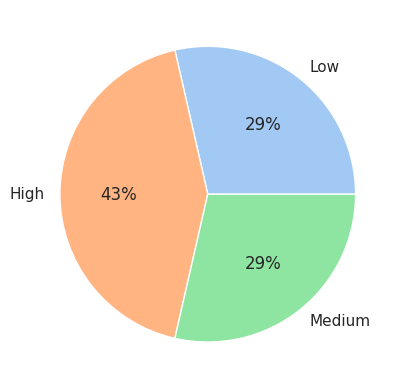

In [ ]:
# declaring data
result = df.groupby(['income']).size()
keys = ['Low','High','Medium']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(result, labels=keys, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

**Insights:**
In the pie chart above, it shows that majority has a higher income in the dataset. Since majority of people have a higher income, there's a possibility that a lot of those people can afford and buy a computer. Of course, it's worth noting that correlation does not necessarily imply causation. Just because a lot of people in the dataset have a higher income does not necessarily mean that they are more likely to buy a computer. Other factors, such as access to technology, personal preferences, and socioeconomic status, could all play a role in determining whether someone chooses to buy a computer.

**b) Bar Plot**

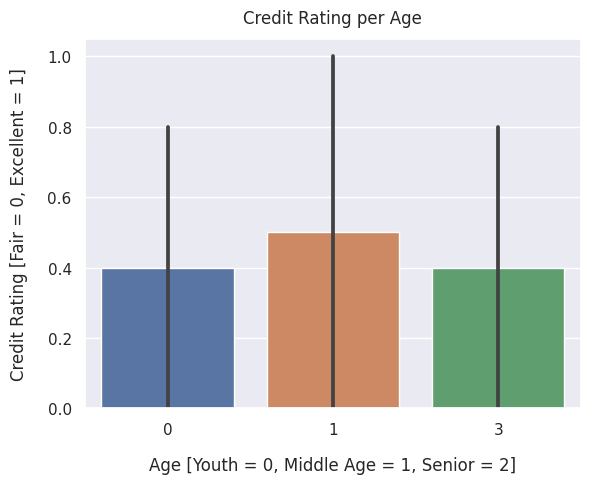

In [ ]:
sns.barplot(x = 'age', y = 'credit_rating', data = df)

plt.xlabel ("Age [Youth = 0, Middle Age = 1, Senior = 2]", labelpad = 14)
plt.ylabel ("Credit Rating [Fair = 0, Excellent = 1]", labelpad = 14)
plt.title ("Credit Rating per Age", y = 1.02);
plt.show()

**Insights:** According to the result of the bar plot above, age of the people and their credit rating were compared. The result of the comparison showed that the majority of people in the middle age category had the highest or excellent credit rating, while the youth and senior categories had a roughly equal amount of credit rating. A higher credit rating typically indicates that the person is more likely to afford or buy a computer.

**c) Horizontal Bar Graph**

Text(0, 0.5, 'Credit Rating')

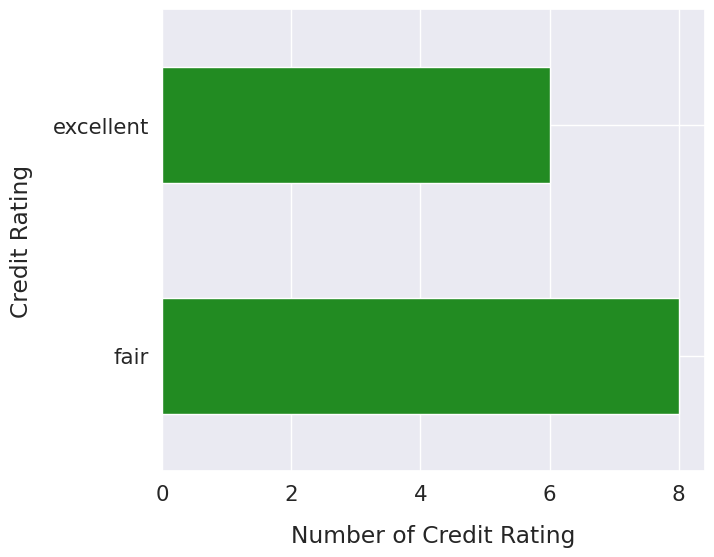

In [ ]:
sns.set(font_scale=1.4)
datavis['credit_rating'].value_counts().plot(kind='barh', figsize=(7, 6), rot=0, color = 'forestgreen')
plt.xlabel("Number of Credit Rating", labelpad=14)
plt.ylabel("Credit Rating", labelpad=14)


**Insights:** The graph shows that the majority of people in the dataset have a fair credit rating, while only a few have an excellent credit rating. The credit rating of individuals can be influenced by a variety of factors, including income level, payment history, and credit utilization. It's interesting to note that that the credit ratings in the dataset may be related to income level, with only a few people having a high income while the majority have medium to low income.